In [7]:
#import essential libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [8]:
# load files 
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sub = pd.read_csv("sample_submission.csv")

#overview of dataset 
print(f"Train Shape: {train.shape}")
print(f"Test Shape: {test.shape}")

Train Shape: (1913, 14)
Test Shape: (479, 13)


In [9]:
#display first few rows
train.head()

,participant_id,age_group,identity_code,cultural_background,upbringing_influence,focus_intensity,consistency_score,external_guidance_usage,support_environment_score,hobby_engagement_level,physical_activity_index,creative_expression_index,altruism_score,personality_cluster
0,643,18,1,0,4,18.118879,24,1,0,1,1,0,0,Cluster_E
1,1753,16,1,3,2,2.469271,19,0,1,0,0,0,1,Cluster_E
2,1402,17,0,2,3,3.456401,25,0,0,0,0,0,0,Cluster_E
3,2033,17,1,0,1,15.838131,25,1,2,0,0,0,0,Cluster_E
4,991,16,0,0,0,1.045373,19,1,2,0,0,1,0,Cluster_E


In [10]:

# Check data types and non-null counts
print("\n--- Data Info ---")
print(train.info())


--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1913 entries, 0 to 1912
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   participant_id             1913 non-null   int64  
 1   age_group                  1913 non-null   int64  
 2   identity_code              1913 non-null   int64  
 3   cultural_background        1913 non-null   int64  
 4   upbringing_influence       1913 non-null   int64  
 5   focus_intensity            1913 non-null   float64
 6   consistency_score          1913 non-null   int64  
 7   external_guidance_usage    1913 non-null   int64  
 8   support_environment_score  1913 non-null   int64  
 9   hobby_engagement_level     1913 non-null   int64  
 10  physical_activity_index    1913 non-null   int64  
 11  creative_expression_index  1913 non-null   int64  
 12  altruism_score             1913 non-null   int64  
 13  personality_cluster        19

In [11]:
# We treat columns with few unique values (<15) as categorical
unique_counts = train.nunique()
target_col = "personality_cluster"
cat_cols_plot = [col for col in train.columns if unique_counts[col] < 15 and col != target_col and col != 'participant_id']
num_cols_plot = [col for col in train.columns if unique_counts[col] >= 15 and col != target_col and col != 'participant_id']

print(f"\nCategorical/Discrete Features: {cat_cols_plot}")
print(f"Continuous Features: {num_cols_plot}")


Categorical/Discrete Features: ['age_group', 'identity_code', 'cultural_background', 'upbringing_influence', 'external_guidance_usage', 'support_environment_score', 'hobby_engagement_level', 'physical_activity_index', 'creative_expression_index', 'altruism_score']
Continuous Features: ['focus_intensity', 'consistency_score']


In [12]:
# Check statistical summary 
print("\n--- Summary Statistics ---")
train.describe(include='all').T


--- Summary Statistics ---


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
participant_id,1913.0,NaN,NaN,NaN,1195.642446,687.474019,1.0,613.0,1189.0,1787.0,2392.0
age_group,1913.0,NaN,NaN,NaN,16.456351,1.124705,15.0,15.0,16.0,17.0,18.0
identity_code,1913.0,NaN,NaN,NaN,0.514375,0.499924,0.0,0.0,1.0,1.0,1.0
cultural_background,1913.0,NaN,NaN,NaN,0.872974,1.031951,0.0,0.0,0.0,2.0,3.0
upbringing_influence,1913.0,NaN,NaN,NaN,1.764245,0.988605,0.0,1.0,2.0,2.0,4.0
focus_intensity,1913.0,NaN,NaN,NaN,9.748506,5.702764,0.008031,4.958649,9.518844,14.407464,19.968425
consistency_score,1913.0,NaN,NaN,NaN,14.6184,8.485326,0.0,7.0,15.0,22.0,29.0
external_guidance_usage,1913.0,NaN,NaN,NaN,0.302143,0.459307,0.0,0.0,0.0,1.0,1.0
support_environment_score,1913.0,NaN,NaN,NaN,2.140617,1.118309,0.0,1.0,2.0,3.0,4.0
hobby_engagement_level,1913.0,NaN,NaN,NaN,0.380031,0.485521,0.0,0.0,0.0,1.0,1.0


In [13]:
# 1. Check for EXACT duplicates (Every column is identical)
exact_dupes_count = train.duplicated().sum()
print(f"Count of exact row duplicates: {exact_dupes_count}")

# View the actual duplicate rows (if any)
if exact_dupes_count > 0:
    print("\n--- Exact Duplicate Rows ---")
    display(train[train.duplicated(keep=False)]) # keep=False shows ALL copies of the duplicate

Count of exact row duplicates: 0


In [29]:
#learn about the target 
target='personality_cluster'
train[target].describe()

count          1913
unique            5
top       Cluster_E
freq            974
Name: personality_cluster, dtype: object

In [30]:
#final any null values in the target 
train.shape
print("Missing in target:",train[target].isnull().sum())

Missing in target: 0


In [33]:
#missing values check
missing_pct=train.isnull().mean().sort_values(ascending=False)
display(pd.DataFrame({'missing_pct':missing_pct}))

# no missing values found

,missing_pct
participant_id,0.0
age_group,0.0
identity_code,0.0
cultural_background,0.0
upbringing_influence,0.0
focus_intensity,0.0
consistency_score,0.0
external_guidance_usage,0.0
support_environment_score,0.0
hobby_engagement_level,0.0


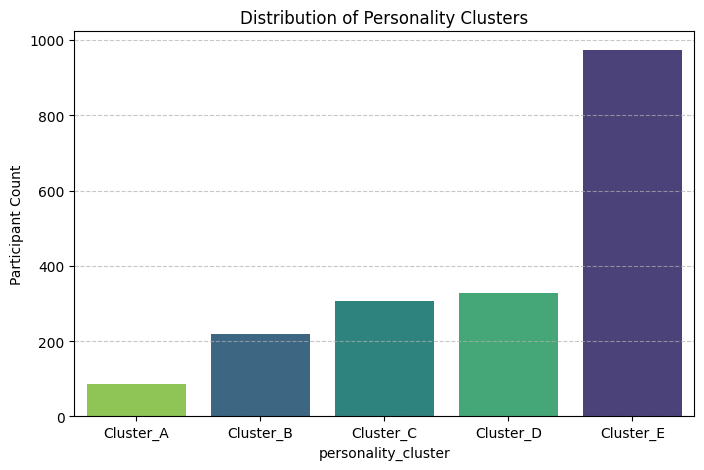

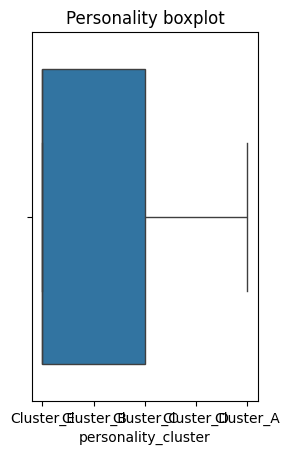

In [35]:
#  EXPLORATORY DATA ANALYSIS 

# 4.1 Target Variable Distribution
target_col = 'personality_cluster'
plt.figure(figsize=(8, 5))
sns.countplot(x=target_col,hue=target_col, data=train, palette='viridis', order=sorted(train[target_col].unique()), legend=False)
plt.title('Distribution of Personality Clusters')
plt.ylabel('Participant Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.subplot(1,2,2)
sns.boxplot(x=train[target_col])
plt.title('Personality boxplot')
plt.show()

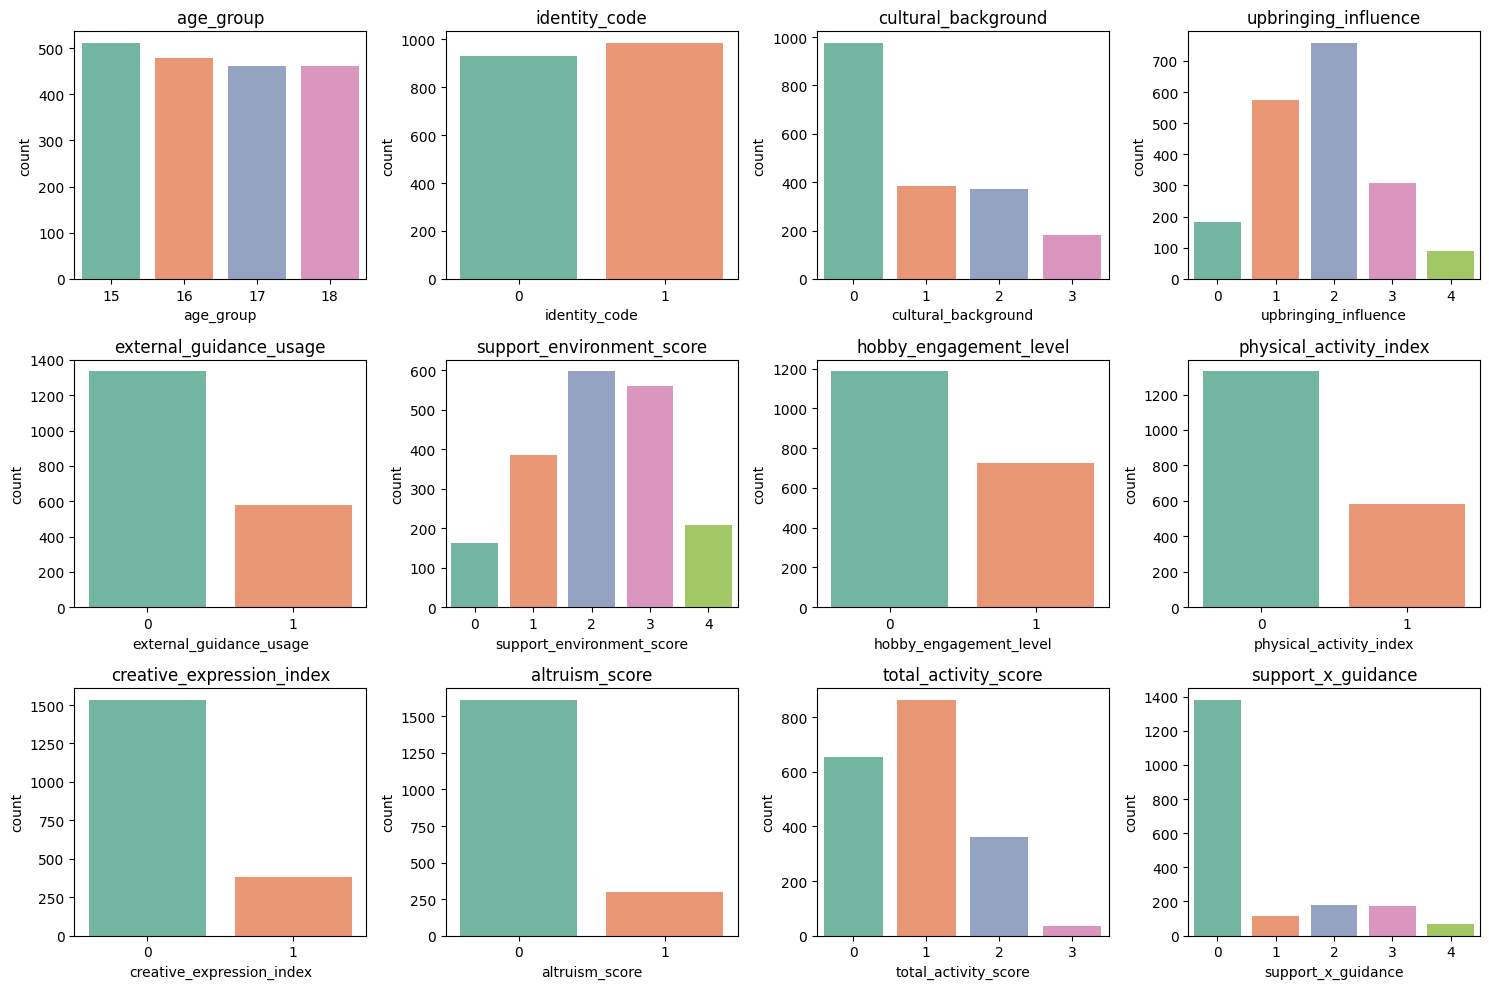

In [37]:
# plot all the categorical features 

plt.figure(figsize=(15, 10))
for i, col in enumerate(cat_cols_plot):
    plt.subplot(3, 4, i+1)
    sns.countplot(x=col, hue=col, data=train, palette='Set2', legend=False)
    plt.title(col)
    plt.tight_layout()
plt.show()


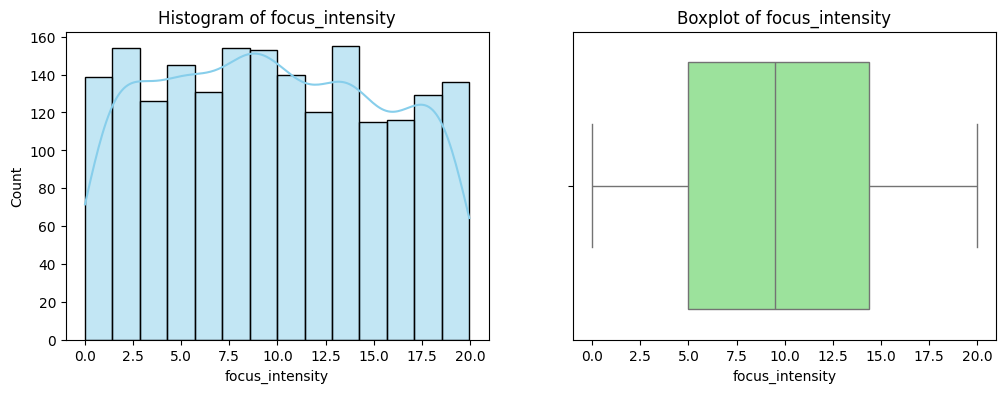

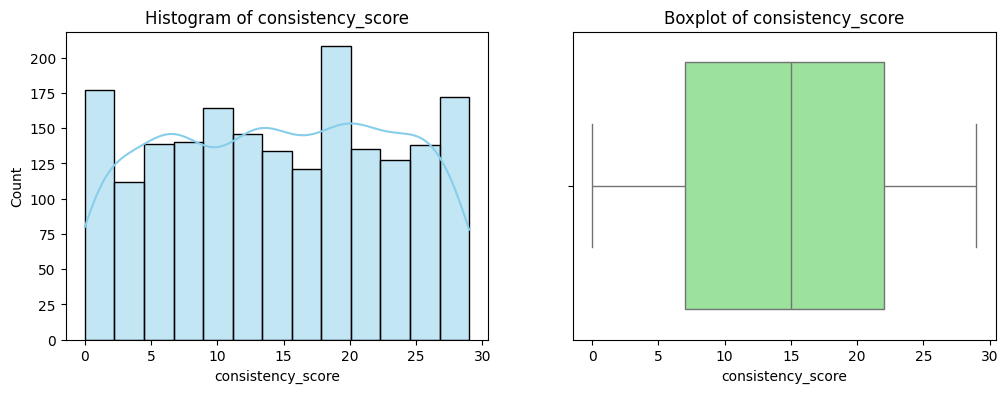

In [9]:
# Plotting Numerical Features (Histograms & Boxplots)
for col in num_cols_plot:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    # Histogram (Distribution)
    sns.histplot(train[col], kde=True, ax=axes[0], color='skyblue')
    axes[0].set_title(f'Histogram of {col}')
    
    # Boxplot (Outliers)
    sns.boxplot(x=train[col], ax=axes[1], color='lightgreen')
    axes[1].set_title(f'Boxplot of {col}')
    plt.show()

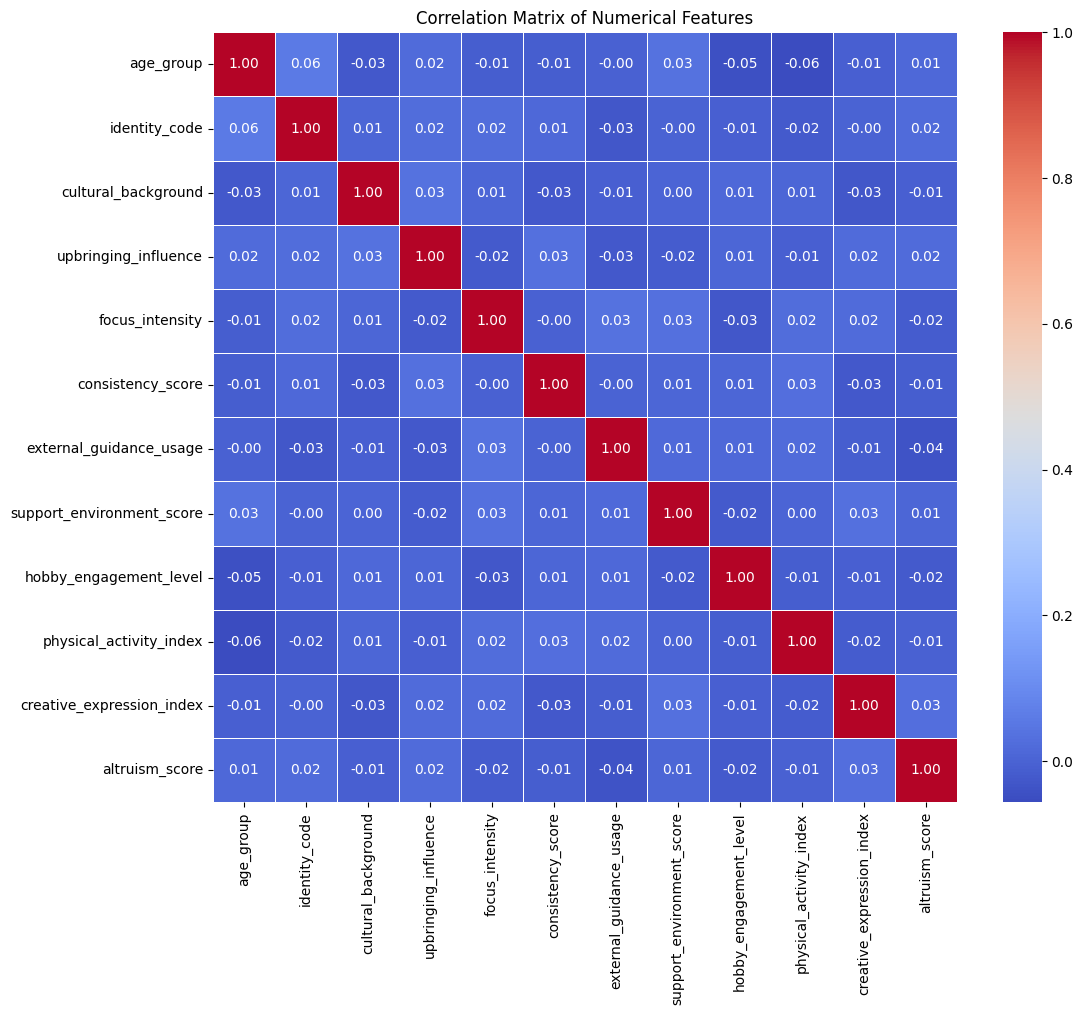

In [10]:
# 4.5 Correlation Matrix
# Filter only numeric columns
numeric_df = train.select_dtypes(include=[np.number]).drop(columns=['participant_id'])
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

--- Plotting Numerical Features vs Target (Boxplots) ---


/tmp/ipykernel_1506/2167681125.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


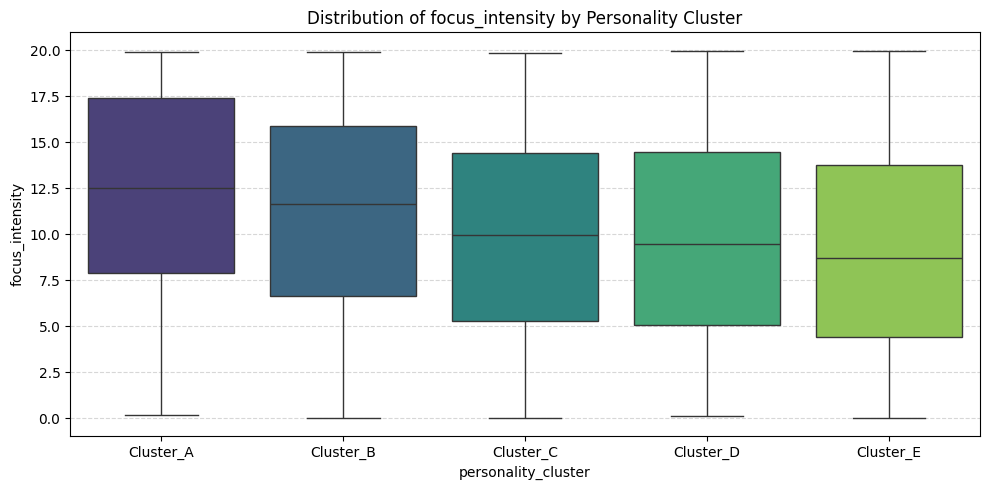

/tmp/ipykernel_1506/2167681125.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


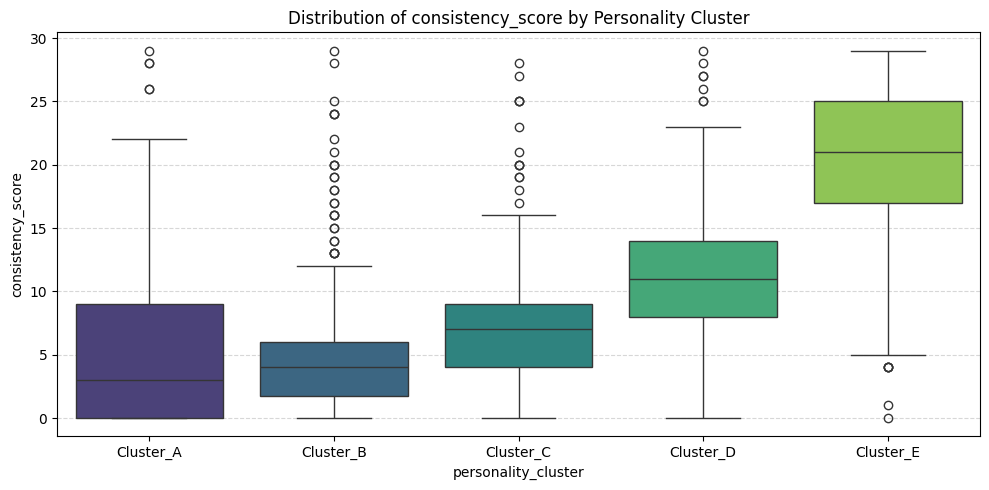

/tmp/ipykernel_1506/2167681125.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


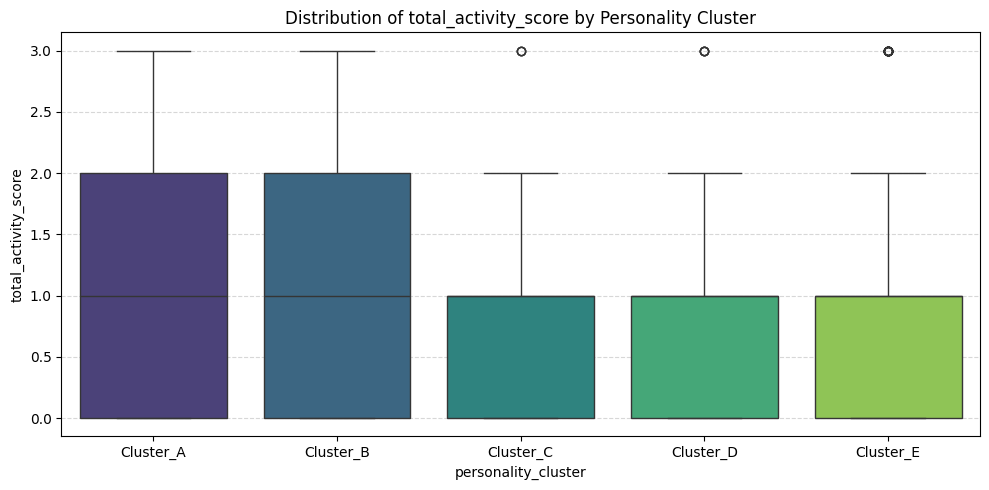

/tmp/ipykernel_1506/2167681125.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


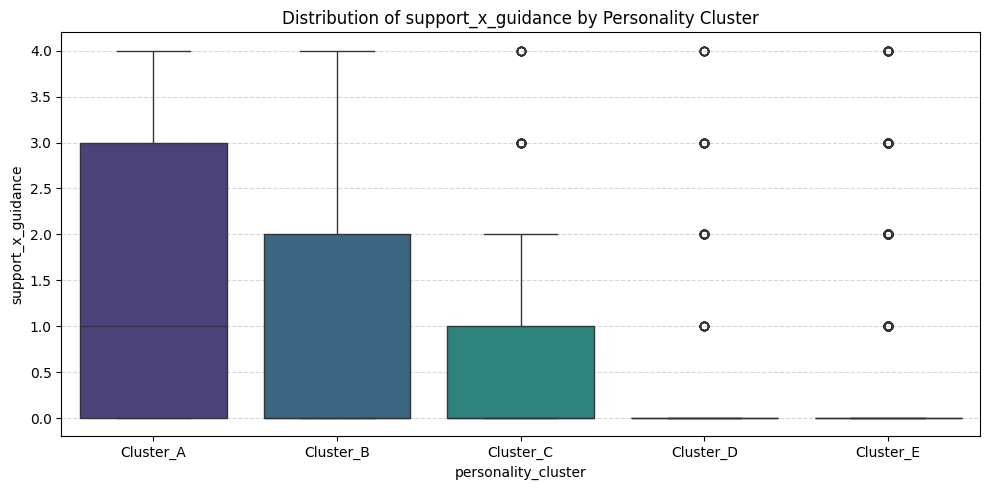

--- Plotting Categorical Features vs Target (Proportions) ---


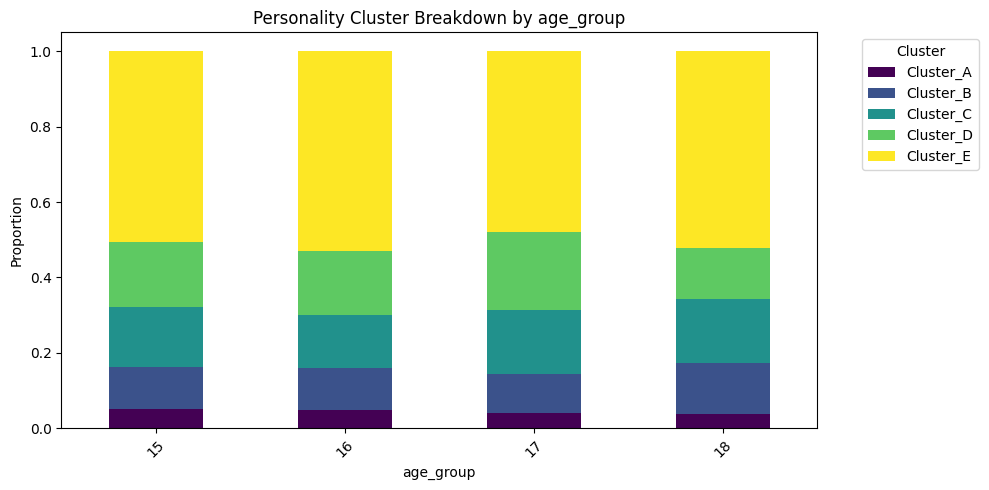

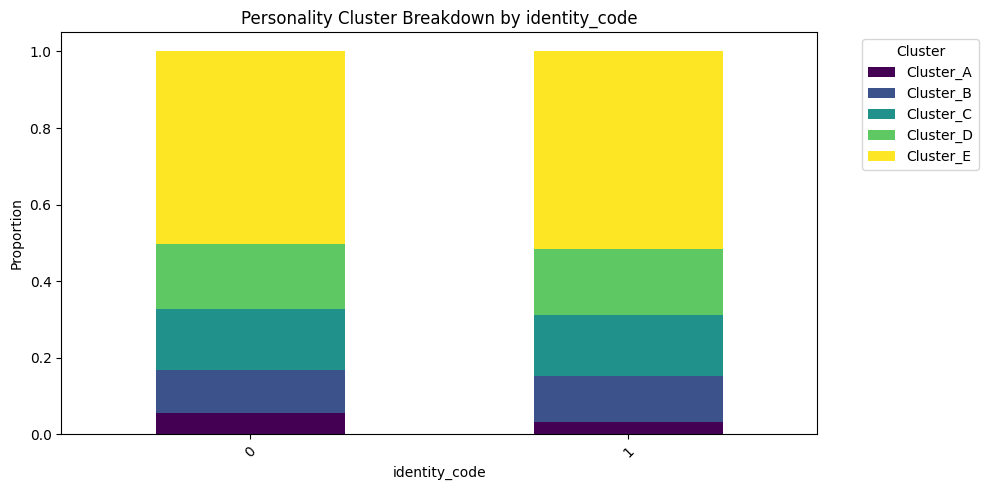

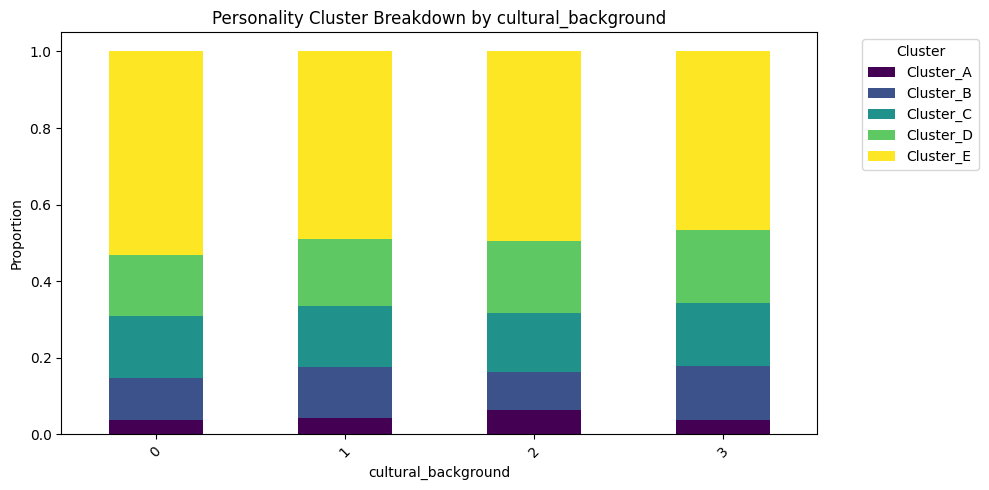

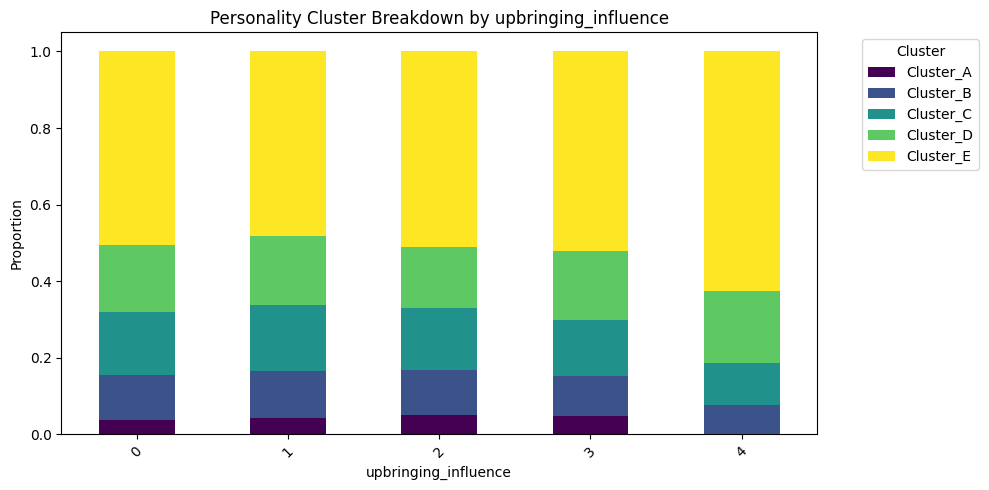

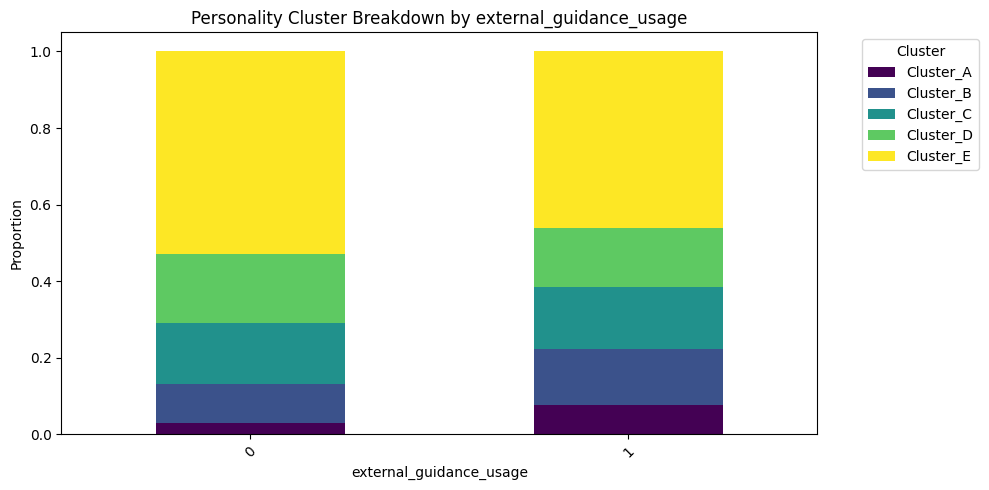

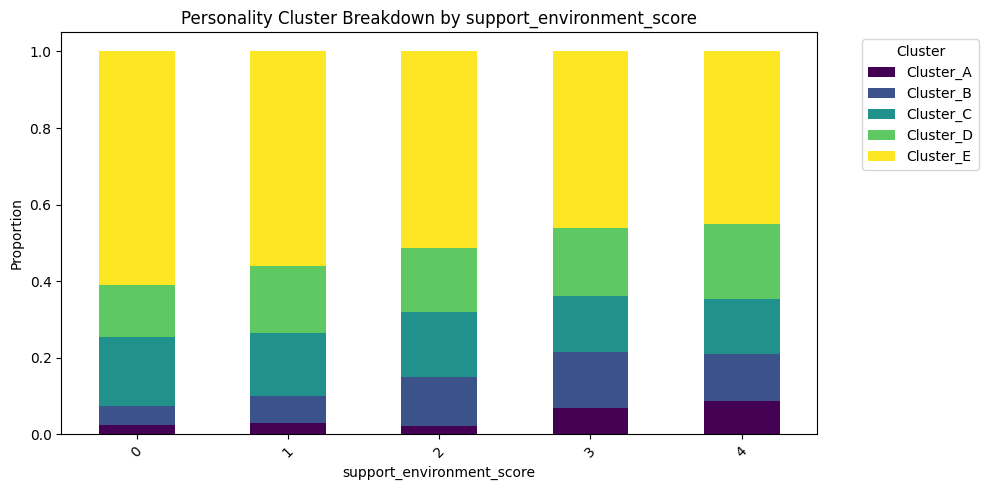

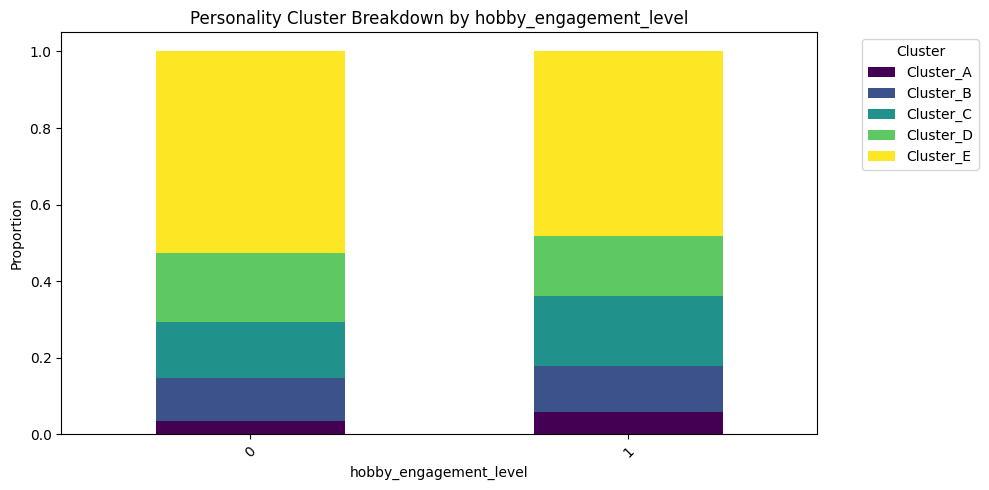

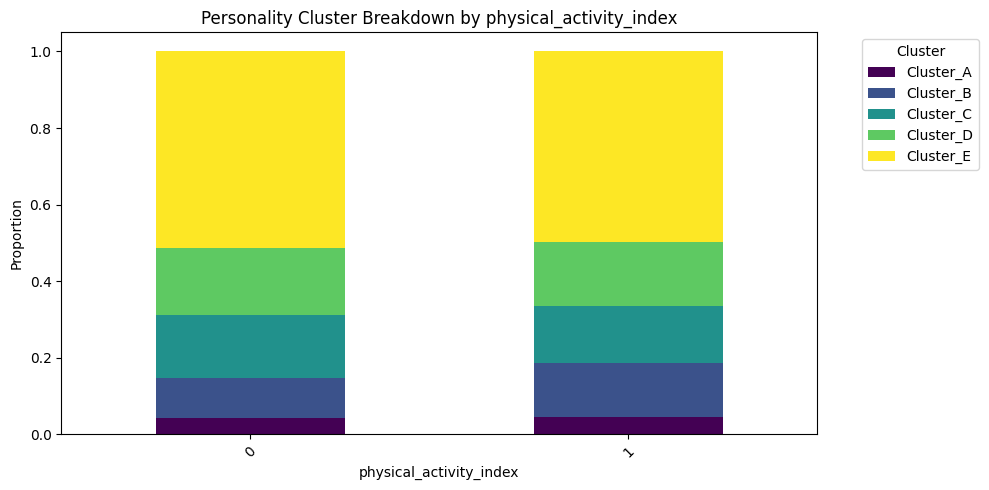

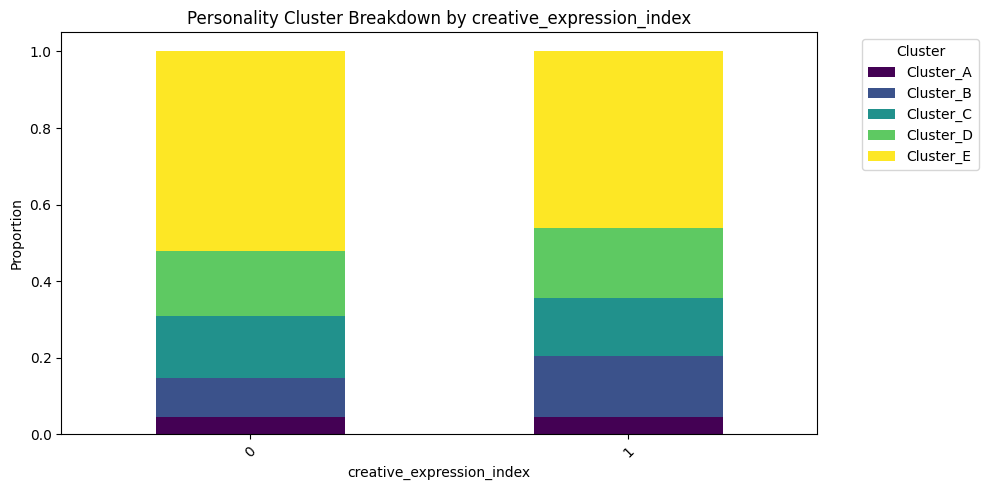

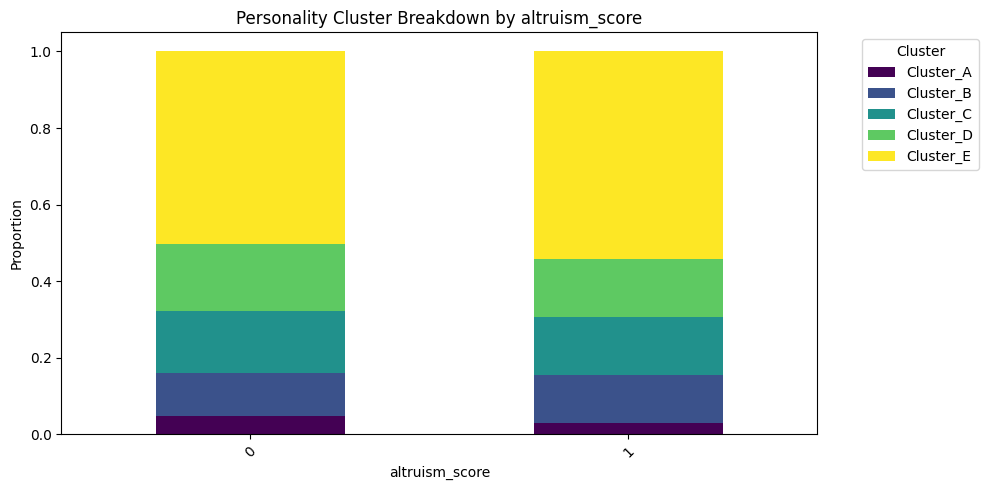

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Define lists of features including the NEW engineered ones
# Numeric/Continuous features
cols_numeric = ['focus_intensity', 'consistency_score', 'total_activity_score', 'support_x_guidance']

# Categorical/Discrete features
cols_categorical = ['age_group', 'identity_code', 'cultural_background', 
                    'upbringing_influence', 'external_guidance_usage', 
                    'support_environment_score', 'hobby_engagement_level',
                    'physical_activity_index', 'creative_expression_index', 
                    'altruism_score']

target_col = 'personality_cluster'

# -------------------------------------------------------
# 1. NUMERIC FEATURES vs TARGET (Boxplots)
# Equivalent to the line plot: shows relationship between value range and target
# -------------------------------------------------------
print("--- Plotting Numerical Features vs Target (Boxplots) ---")

for col in cols_numeric:
    plt.figure(figsize=(10, 5))
    
    # Boxplot shows the distribution of the feature for each cluster
    # This helps identify if high/low values of a feature push users into specific clusters
    sns.boxplot(
        x=target_col, 
        y=col, 
        data=train, 
        palette="viridis", 
        order=sorted(train[target_col].unique())
    )
    
    plt.title(f"Distribution of {col} by Personality Cluster")
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

# -------------------------------------------------------
# 2. CATEGORICAL FEATURES vs TARGET (Stacked Bar Charts)
# Equivalent to the bar plot: shows cluster proportions per category
# -------------------------------------------------------
print("--- Plotting Categorical Features vs Target (Proportions) ---")

for col in cols_categorical:
    # Crosstab calculates the frequency of each cluster for every category
    # normalize='index' converts counts to percentages (0-1 range)
    cross_tab = pd.crosstab(train[col], train[target_col], normalize='index')
    
    # Plotting a 100% stacked bar chart
    ax = cross_tab.plot(kind='bar', stacked=True, figsize=(10, 5), colormap='viridis')
    
    plt.title(f"Personality Cluster Breakdown by {col}")
    plt.ylabel("Proportion")
    plt.xlabel(col)
    
    # Move legend outside for clarity
    plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [41]:
from scipy.stats import chi2_contingency
import pandas as pd

# List of categorical/discrete features to test
# (Including the new features created in feature engineering if they are discrete)
cat_cols_test = [
    'age_group', 'identity_code', 'cultural_background', 
    'upbringing_influence', 'external_guidance_usage', 
    'support_environment_score', 'hobby_engagement_level',
    'physical_activity_index', 'creative_expression_index', 
    'altruism_score', 'total_activity_score', 'support_x_guidance'
]

target_col = 'personality_cluster'

print(f"=== Chi-Square Test Results (Target: {target_col}) ===")
print(f"{'Feature':<30} | {'P-Value':<10} | {'Conclusion'}")
print("-" * 65)

results = []

for col in cat_cols_test:
    # 1. Create Contingency Table (Cross-tabulation)
    # Rows: Feature Categories, Columns: Target Classes (Clusters)
    contingency_table = pd.crosstab(train[col], train[target_col])
    
    # 2. Calculate Chi-Square statistics
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    # 3. Interpret P-Value
    if p < 0.05:
        conclusion = "Significant (Keep)"
    else:
        conclusion = "Not Significant (Consider Dropping)"

    print(f"{col:<30} | {p:.5f}    | {conclusion}")
    
    # Store results for sorting later if needed
    results.append({'Feature': col, 'P-Value': p, 'Significant': p < 0.05})

# Optional: View as a sorted DataFrame (Most significant on top)
print("\n--- Sorted Results ---")
results_df = pd.DataFrame(results).sort_values(by='P-Value')
print(results_df)

=== Chi-Square Test Results (Target: personality_cluster) ===
Feature                        | P-Value    | Conclusion
-----------------------------------------------------------------
age_group                      | 0.31029    | Not Significant (Consider Dropping)
identity_code                  | 0.21584    | Not Significant (Consider Dropping)
cultural_background            | 0.51482    | Not Significant (Consider Dropping)
upbringing_influence           | 0.62792    | Not Significant (Consider Dropping)
external_guidance_usage        | 0.00000    | Significant (Keep)
support_environment_score      | 0.00000    | Significant (Keep)
hobby_engagement_level         | 0.01528    | Significant (Keep)
physical_activity_index        | 0.21303    | Not Significant (Consider Dropping)
creative_expression_index      | 0.02295    | Significant (Keep)
altruism_score                 | 0.46182    | Not Significant (Consider Dropping)
total_activity_score           | 0.00841    | Significant (Keep

In [42]:
from scipy.stats import zscore
import pandas as pd
import numpy as np

# 1. Define the list of numeric columns to check
# We exclude ID, Target, and the Nominal feature 'cultural_background'
cols_to_exclude = ['participant_id', 'personality_cluster', 'target', 'cultural_background']
num_cols = [col for col in train.select_dtypes(include=[np.number]).columns 
            if col not in cols_to_exclude]

outlier_summary = {}

# 2. Calculate Z-scores and count outliers
for col in num_cols:
    # Calculate absolute Z-score
    z = abs(zscore(train[col]))
    
    # Count how many data points are more than 3 standard deviations away
    outlier_count = (z > 3).sum()
    outlier_summary[col] = outlier_count

# 3. Display results
print("=== Outlier Counts (z > 3) ===")
results_series = pd.Series(outlier_summary).sort_values(ascending=False)
print(results_series)

=== Outlier Counts (z > 3) ===
age_group                    0
identity_code                0
upbringing_influence         0
focus_intensity              0
consistency_score            0
external_guidance_usage      0
support_environment_score    0
hobby_engagement_level       0
physical_activity_index      0
creative_expression_index    0
altruism_score               0
total_activity_score         0
support_x_guidance           0
dtype: int64


--- Kernel Density Estimate (KDE) Plots ---


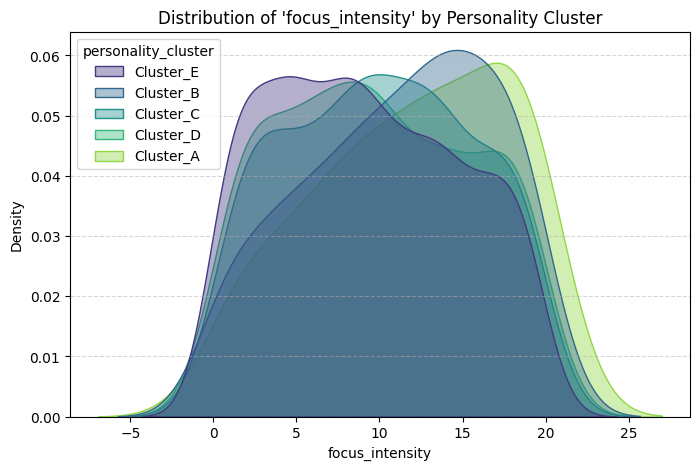

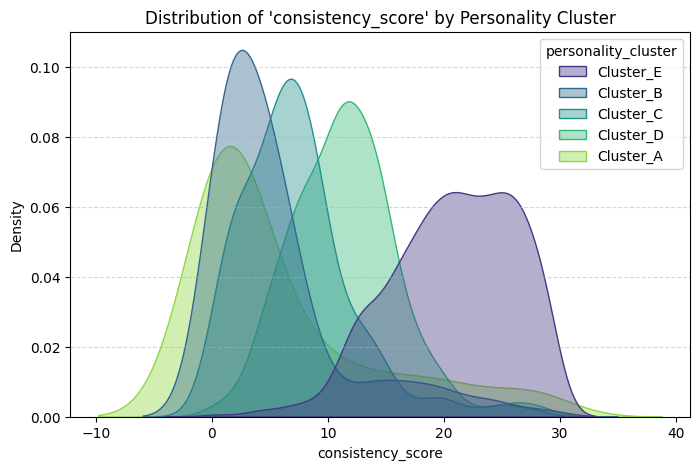

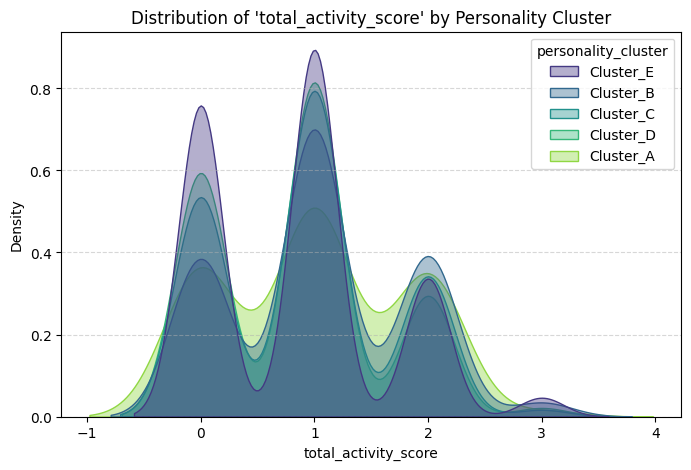

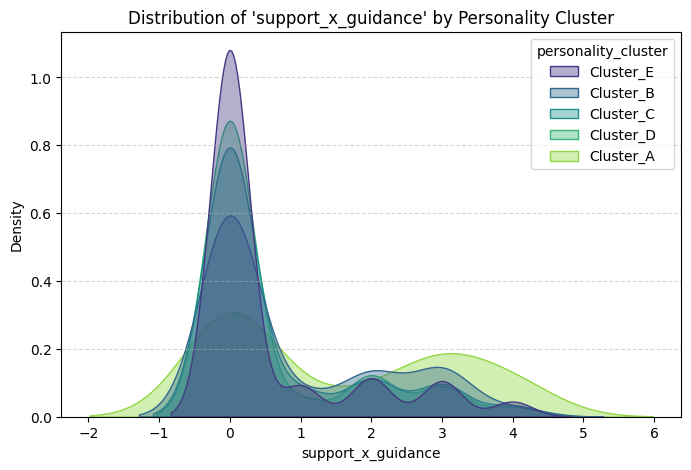

In [46]:
# --- INTERPRETATION GUIDE (What does this plot tell you?) ---
    # 1. SEPARATION (Discriminative Power):
    #    - Look at the peaks of different colors (clusters).
    #    - If the peaks are far apart (e.g., Cluster A is at 0, Cluster B is at 100),
    #      it means this feature is VERY GOOD at distinguishing between those clusters.
    
    # 2. OVERLAP (Redundancy):
    #    - If the curves for all clusters sit right on top of each other (perfect overlap),
    #      it means this feature behaves the same way for everyone.
    #    - High overlap = Low predictive value for this specific feature.
    
    # 3. SHAPE (Distribution):
    #    - Bell curve? The data is normally distributed.
    #    - Two peaks (Bimodal)? There might be two distinct subgroups within that cluster.
    #    - Long tail? The data is skewed (has outliers on one side).


import seaborn as sns
import matplotlib.pyplot as plt

# List of numeric features to visualize (including engineered ones)
numeric_cols_plot = ['focus_intensity', 'consistency_score', 'total_activity_score', 'support_x_guidance']
target_col = 'personality_cluster'

print("--- Kernel Density Estimate (KDE) Plots ---")

for col in numeric_cols_plot:
    plt.figure(figsize=(8, 5))
    
    # Plot KDE
    # hue=target_col: Draws a separate curve for each Personality Cluster
    # common_norm=False: Scales each curve so its area is 1 (easy to compare shapes)
    sns.kdeplot(
        data=train, 
        x=col, 
        hue=target_col, 
        fill=True, 
        common_norm=False, 
        palette="viridis", 
        alpha=0.4  # Transparency lets you see overlapping curves
    )
    
    plt.title(f"Distribution of '{col}' by Personality Cluster")
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.show()

In [12]:
#processing pipeline

# 5.1 Define Features and Target
X = train.drop([target_col, 'participant_id'], axis=1)
y = train[target_col]
X_test = test.drop(['participant_id'], axis=1)

In [13]:
# 5.2 Identify Feature Roles

# 'cultural_background' is Nominal (0,1,2,3 are not ordered) -> OneHotEncoder
# All others are Numeric/Ordinal -> StandardScaler
nominal_features = ['cultural_background']
numeric_features = [col for col in X.columns if col not in nominal_features]

In [14]:
# 5.3 Build Transformers

# Numeric: Impute missing (Median) + Scale (StandardScaler)
from sklearn.preprocessing import PowerTransformer

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    # Yeo-Johnson works on positive and negative values and fixes skewness
    ('power', PowerTransformer(method='yeo-johnson')) 
])

# Nominal: Impute missing (Mode) + OneHot Encode
# handle_unknown='ignore' is crucial for production/test data stability
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

In [15]:
# 5.4 Combine into Preprocessor

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, nominal_features)
    ]
)

In [16]:
# 5.5 Encode Target Label

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
print(f"\nTarget Classes Mapping: {dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))}")


Target Classes Mapping: {'Cluster_A': np.int64(0), 'Cluster_B': np.int64(1), 'Cluster_C': np.int64(2), 'Cluster_D': np.int64(3), 'Cluster_E': np.int64(4)}


In [17]:
# 5.6 Apply Transformations

# Fit on Train, Transform Train and Test
X_processed_array = preprocessor.fit_transform(X)
X_test_processed_array = preprocessor.transform(X_test)

In [18]:
# 5.7 Reconstruct DataFrames (for readability/verification)
# Get new column names for OneHot features

ohe_feature_names = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(nominal_features)
all_feature_names = numeric_features + list(ohe_feature_names)

X_processed_df = pd.DataFrame(X_processed_array, columns=all_feature_names)
X_test_processed_df = pd.DataFrame(X_test_processed_array, columns=all_feature_names)

# Add target back to train for final check
train_final = X_processed_df.copy()
train_final['target'] = y_encoded

print("\n--- Final Processed Train Data (Head) ---")
print(train_final.head())


--- Final Processed Train Data (Head) ---
   age_group  identity_code  upbringing_influence  focus_intensity  \
0   1.348561       0.971651              2.111617         1.369777   
1  -0.380730       0.971651              0.278934        -1.320649   
2   0.506180      -1.029176              1.223524        -1.096961   
3   0.506180       0.971651             -0.747437         1.041296   
4  -0.380730      -1.029176             -1.914330        -1.681528   

   consistency_score  external_guidance_usage  support_environment_score  \
0           1.071708                 1.519766                  -1.884734   
1           0.555570                -0.657996                  -1.024123   
2           1.171774                -0.657996                  -1.884734   
3           1.171774                 1.519766                  -0.137296   
4           0.555570                 1.519766                  -0.137296   

   hobby_engagement_level  physical_activity_index  creative_expression_index  

Processed Data Shape: (1913, 12)
Running PCA...


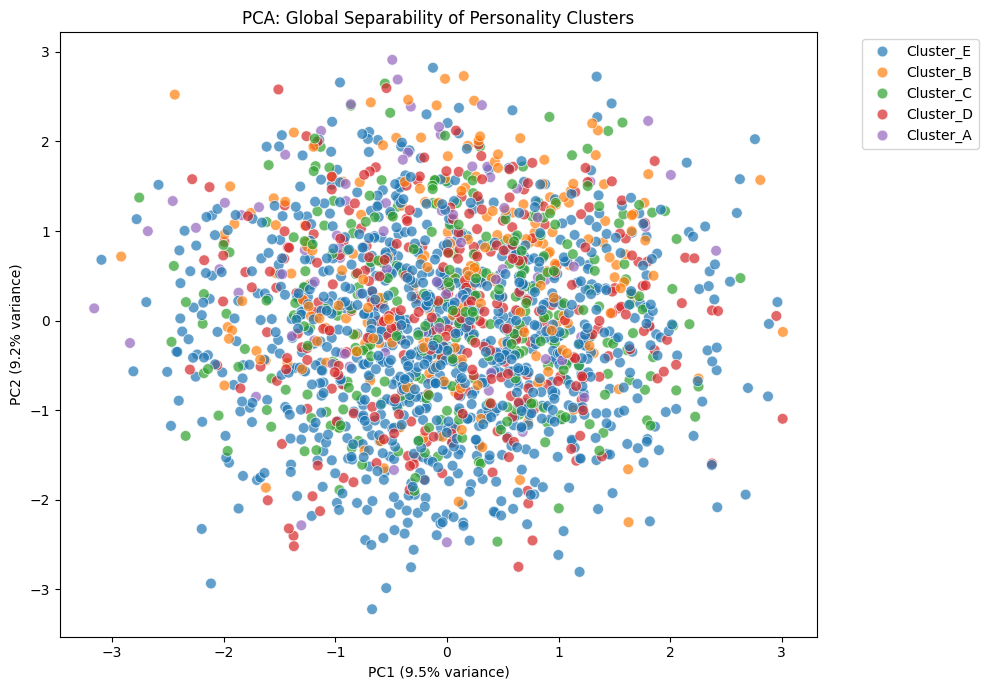

Running t-SNE (this takes a moment)...


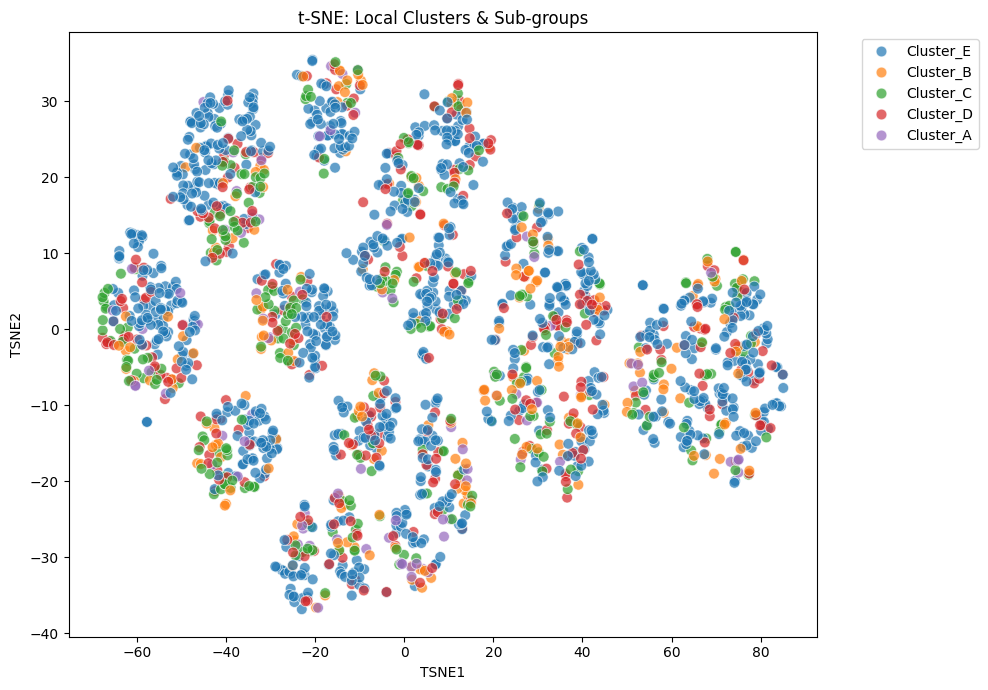

Generating Pairplot for: ['focus_intensity', 'consistency_score', 'personality_cluster']


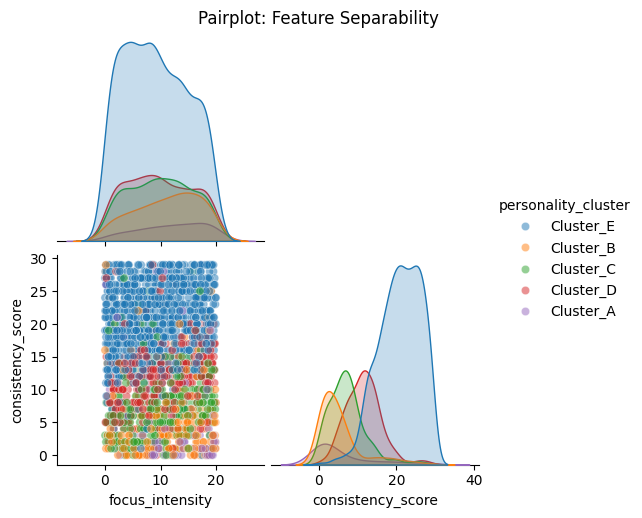

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# -------------------------------
# 1. Load Data
# -------------------------------
train = pd.read_csv("train.csv")

df_eng = train

# -------------------------------
# 3. Preprocessing for Visualization
# -------------------------------
target_col = 'personality_cluster'
id_col = 'participant_id'

# Drop ID and separate Target
X = df_eng.drop(columns=[id_col, target_col], errors='ignore')
y = df_eng[target_col]

# Identify columns automatically
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Impute Numerical Columns
if num_cols:
    num_imputer = SimpleImputer(strategy="median")
    X[num_cols] = num_imputer.fit_transform(X[num_cols])

# Impute Categorical Columns
if cat_cols:
    cat_imputer = SimpleImputer(strategy="most_frequent")
    X[cat_cols] = cat_imputer.fit_transform(X[cat_cols])

# One-Hot Encoding (PCA/t-SNE need numbers)
X_encoded = pd.get_dummies(X, drop_first=True)

# Scale (CRITICAL for PCA/t-SNE)
print(f"Processed Data Shape: {X_encoded.shape}")
scaler = StandardScaler()
Z = scaler.fit_transform(X_encoded)

# ======================================================
# 4. PCA Visualization (Linear Separability)
# ======================================================
print("Running PCA...")
pca = PCA(n_components=2)
pca_comp = pca.fit_transform(Z)

pca_df = pd.DataFrame({
    "PC1": pca_comp[:, 0],
    "PC2": pca_comp[:, 1],
    "Cluster": y
})

plt.figure(figsize=(10, 7))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="Cluster", 
                palette="tab10", alpha=0.7, s=60)
plt.title("PCA: Global Separability of Personality Clusters")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# ======================================================
# 5. t-SNE Visualization (Nonlinear Clusters)
# ======================================================
print("Running t-SNE (this takes a moment)...")

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_comp = tsne.fit_transform(Z)

tsne_df = pd.DataFrame({
    "TSNE1": tsne_comp[:, 0],
    "TSNE2": tsne_comp[:, 1],
    "Cluster": y
})

plt.figure(figsize=(10, 7))
sns.scatterplot(data=tsne_df, x="TSNE1", y="TSNE2", hue="Cluster", 
                palette="tab10", alpha=0.7, s=60)
plt.title("t-SNE: Local Clusters & Sub-groups")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# ======================================================
# 6. Pairplot (Top Features vs Target)
# ======================================================
# Select top features
top_features = [
    'support_x_guidance',     
    'total_activity_score',   
    'focus_intensity',
    'consistency_score',
    'personality_cluster'     
]

# Ensure columns exist in df_eng before plotting
plot_cols = [c for c in top_features if c in df_eng.columns]

if len(plot_cols) > 1:
    print(f"Generating Pairplot for: {plot_cols}")
    sns.pairplot(df_eng[plot_cols], hue="personality_cluster", 
                 palette="tab10", diag_kind="kde", corner=True, 
                 plot_kws={'alpha':0.5})
    plt.suptitle("Pairplot: Feature Separability", y=1.02)
    plt.show()
else:
    print("Not enough features found for Pairplot.")